In [2]:
import pandas as pd
import random

import numpy as np

In [3]:
pip install Faker

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from faker import Faker

In [5]:
# Initialize Faker and random seeds
fake = Faker()
Faker.seed(42)
random.seed(42)
np.random.seed(42)

In [10]:
# Department and job structure
departments = ["HR", "Finance", "Water Operations", "Infrastructure", "Customer Service", "Engineering"]
job_titles = {
    "HR": ["HR Analyst", "Recruiter", "HR Manager", "HR Specialist"],
    "Finance": ["Accountant", "Financial Analyst", "Budget Officer"],
    "Water Operations": ["Operations Supervisor", "Water Quality Analyst"],
    "Infrastructure": ["Engineer I", "Engineer II", "Civil Engineer"],
    "Customer Service": ["Service Rep", "CSR Lead"],
    "Engineering": ["Systems Engineer", "Project Engineer"]
}
fund_sources = ["General Fund", "Utility Fund", "Capital Fund", "Grant Fund"]
sources = ["LinkedIn", "Indeed", "City Portal", "Employee Referral", "GovernmentJobs", "Career Fair"]
statuses = ["Hired", "Interviewing", "Rejected", "Offer Extended", "Screening"]
employment_statuses = ["Active", "On Leave", "Terminated"]
vacancy_statuses = ["Filled", "1 Vacancy", "2 Vacancies"]

# -------------------------------
# 1. PeopleSoft_Employee_Data
# -------------------------------
people_data = []
for i in range(100):
    dept = random.choice(departments)
    job = random.choice(job_titles[dept])
    people_data.append({
        "employee_id": 1000 + i,
        "first_name": fake.first_name(),
        "last_name": fake.last_name(),
        "department": dept,
        "job_title": job,
        "hire_date": fake.date_between(start_date='-10y', end_date='today'),
        "employment_status": random.choice(employment_statuses),
        "position_id": f"P{120 + i:03}",
        "salary": random.randint(60000, 150000),
        "supervisor_id": random.choice([None] + [1000 + j for j in range(10)])
    })

df_people = pd.DataFrame(people_data)
df_people.to_csv("d:/PeopleSoft_Employee_Data.csv", index=False)
print("✅ Created: PeopleSoft_Employee_Data.csv")

# -------------------------------
# 2. SmartRecruiters_Applicant_Data
# -------------------------------
smart_data = []
for i in range(100):
    dept = random.choice(departments)
    job = random.choice(job_titles[dept])
    status = random.choice(statuses)
    hire_date = fake.date_between(start_date='-1y', end_date='today') if status == "Hired" else None
    smart_data.append({
        "applicant_id": f"A{i+1:03}",
        "job_id": f"J{500 + i}",
        "job_title": job,
        "application_date": fake.date_between(start_date='-1y', end_date='today'),
        "status": status,
        "hire_date": hire_date,
        "source": random.choice(sources),
        "recruiter": fake.name(),
        "department": dept
    })

df_smart = pd.DataFrame(smart_data)

✅ Created: PeopleSoft_Employee_Data.csv


In [8]:
df_smart.to_csv("d:/SmartRecruiters_Applicant_Data.csv", index=False)
print("✅ Created: SmartRecruiters_Applicant_Data.csv")

✅ Created: SmartRecruiters_Applicant_Data.csv


In [9]:
# -------------------------------
# 3. Position_Control_System
# -------------------------------
position_data = []
for i in range(100):
    dept = random.choice(departments)
    job = random.choice(job_titles[dept])
    position_data.append({
        "position_id": f"P{120 + i:03}",
        "job_title": job,
        "department": dept,
        "budgeted_fte": round(random.choice([1.0, 1.5, 2.0, 3.0]), 1),
        "filled_fte": round(random.choice([1.0, 1.5, 2.0, 3.0]), 1),
        "vacancy_status": random.choice(vacancy_statuses),
        "fund_source": random.choice(fund_sources),
        "last_updated": fake.date_between(start_date='-3M', end_date='today')
    })

df_position = pd.DataFrame(position_data)
df_position.to_csv("d:/Position_Control_System.csv", index=False)
print("✅ Created: Position_Control_System.csv")


✅ Created: Position_Control_System.csv


In [11]:
df_position

,position_id,job_title,department,budgeted_fte,filled_fte,vacancy_status,fund_source,last_updated
0,P120,CSR Lead,Customer Service,1.0,1.5,Filled,Grant Fund,2025-10-23
1,P121,Service Rep,Customer Service,3.0,3.0,1 Vacancy,Capital Fund,2025-10-12
2,P122,CSR Lead,Customer Service,2.0,1.0,2 Vacancies,General Fund,2025-09-16
3,P123,Budget Officer,Finance,1.5,2.0,2 Vacancies,General Fund,2025-08-09
4,P124,Accountant,Finance,1.5,1.0,Filled,General Fund,2025-10-23
...,...,...,...,...,...,...,...,...
95,P215,HR Manager,HR,3.0,2.0,Filled,Utility Fund,2025-10-15
96,P216,Civil Engineer,Infrastructure,1.0,1.0,Filled,Capital Fund,2025-09-29
97,P217,Accountant,Finance,2.0,2.0,1 Vacancy,General Fund,2025-09-26
98,P218,HR Specialist,HR,3.0,1.5,Filled,Grant Fund,2025-10-03


In [12]:
df_smart

,applicant_id,job_id,job_title,application_date,status,hire_date,source,recruiter,department
0,A001,J500,Financial Analyst,2024-12-21,Screening,None,Indeed,Jacob Avery,Finance
1,A002,J501,Recruiter,2025-07-27,Interviewing,None,Indeed,Jennifer Newton,HR
2,A003,J502,Engineer I,2024-12-29,Rejected,None,GovernmentJobs,Mary Bass,Infrastructure
3,A004,J503,CSR Lead,2025-06-26,Offer Extended,None,GovernmentJobs,Trevor Johnson,Customer Service
4,A005,J504,Budget Officer,2025-01-22,Hired,2025-03-22,LinkedIn,Trevor Foley,Finance
...,...,...,...,...,...,...,...,...,...
95,A096,J595,HR Manager,2025-10-15,Screening,None,GovernmentJobs,Jeffrey Jenkins,HR
96,A097,J596,HR Manager,2025-07-19,Rejected,None,Employee Referral,Tracy Bishop,HR
97,A098,J597,Project Engineer,2025-08-18,Interviewing,None,GovernmentJobs,Joann Ferguson,Engineering
98,A099,J598,Engineer II,2025-02-27,Interviewing,None,LinkedIn,Rachel Mckee,Infrastructure


In [13]:
df_people

,employee_id,first_name,last_name,department,job_title,hire_date,employment_status,position_id,salary,supervisor_id
0,1000,Sarah,Coleman,Infrastructure,Engineer I,2025-02-03,On Leave,P120,70205,1004.0
1,1001,Jeffrey,Hernandez,Customer Service,CSR Lead,2020-05-07,Terminated,P121,113008,1009.0
2,1002,Margaret,Jones,Infrastructure,Engineer II,2018-08-27,Active,P122,113088,NaN
3,1003,Laura,Larson,Water Operations,Operations Supervisor,2025-07-06,Terminated,P123,120305,1004.0
4,1004,Samantha,Gonzales,HR,HR Specialist,2023-10-21,Active,P124,91891,1005.0
...,...,...,...,...,...,...,...,...,...,...
95,1095,Rose,Walker,Customer Service,CSR Lead,2016-11-26,Terminated,P215,124382,1002.0
96,1096,Cynthia,Marshall,HR,Recruiter,2020-12-20,Active,P216,119250,1001.0
97,1097,Debra,Wilson,Engineering,Project Engineer,2016-08-07,Active,P217,149381,1004.0
98,1098,Sophia,Torres,Engineering,Project Engineer,2024-03-18,Terminated,P218,68511,1007.0


In [15]:
df_people.columns

Index(['employee_id', 'first_name', 'last_name', 'department', 'job_title',
       'hire_date', 'employment_status', 'position_id', 'salary',
       'supervisor_id'],
      dtype='object')

In [21]:
import pandas as pd

df = df_people
df['hire_date'] = pd.to_datetime(df['hire_date'])
df['year_month'] = df['hire_date'].dt.to_period('M')

# Headcount = active employees per month
headcount = df[df['employment_status'] == 'Active'].groupby('year_month').size()

# Terminations = employees who left
terminated = df[df['employment_status'] == 'Terminated'].groupby('year_month').size()

# Combine
df_turnover = pd.DataFrame({
    'Headcount': headcount,
    'Terminations': terminated
}).fillna(0)

df_turnover['Turnover Rate (%)'] = (df_turnover['Terminations'] / df_turnover['Headcount']) * 100
print(df_turnover.head())

            Headcount  Terminations  Turnover Rate (%)
year_month                                            
2015-11           0.0           1.0                inf
2016-01           1.0           0.0                0.0
2016-04           0.0           1.0                inf
2016-07           1.0           0.0                0.0
2016-08           2.0           0.0                0.0


In [23]:
# Combine into one DataFrame
df_trends = pd.DataFrame({
    'Headcount': headcount,
    'Terminations': terminated
}).fillna(0)

# Turnover Rate (%)
df_trends['Turnover Rate (%)'] = (df_trends['Terminations'] / df_trends['Headcount'].replace(0, pd.NA)) * 100


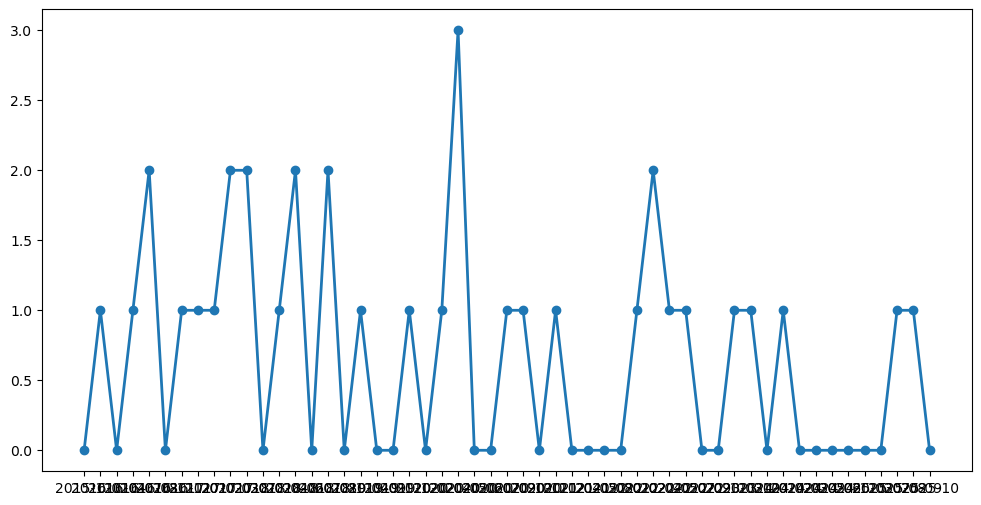

In [26]:
# ----------------------------
# 3. Visualization
# ----------------------------
plt.figure(figsize=(12, 6))

# Plot Headcount trend
plt.plot(df_trends.index.astype(str), df_trends['Headcount'], label='Headcount', marker='o', linewidth=2)



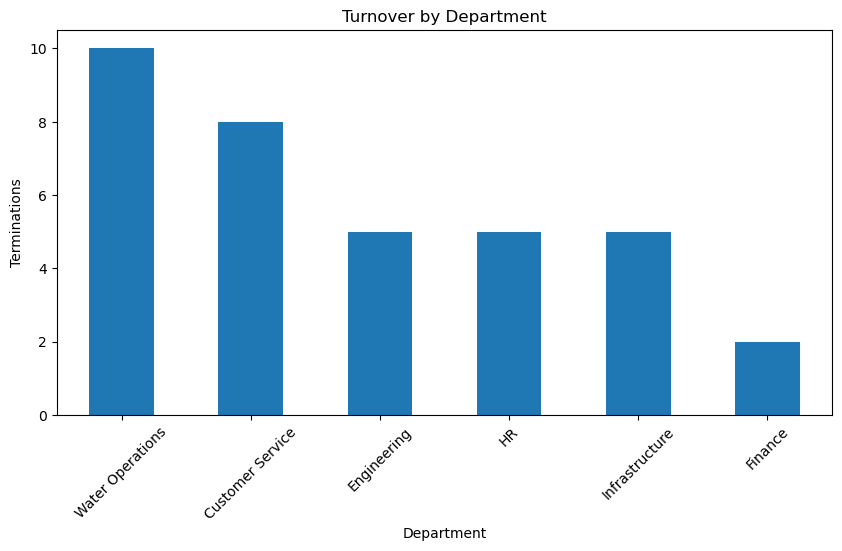

In [22]:
turnover_by_dept = (
    df[df['employment_status'] == 'Terminated']
    .groupby('department')
    .size()
    .sort_values(ascending=False)
)

turnover_by_dept.plot(kind='bar', figsize=(10,5), title="Turnover by Department", rot=45)
plt.xlabel("Department")
plt.ylabel("Terminations")
plt.show()


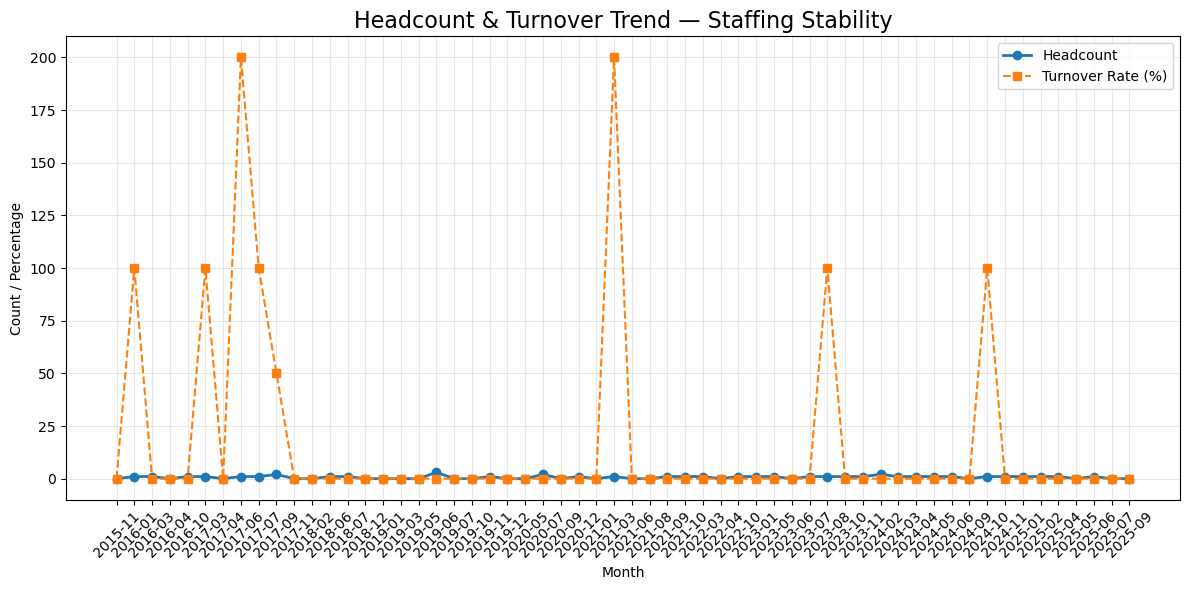

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load and prepare data
# ----------------------------
df = pd.read_csv("PeopleSoft_Employee_Data.csv")

# Ensure date column is in datetime format
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

# Create a year-month column for grouping
df['year_month'] = df['hire_date'].dt.to_period('M')

# ----------------------------
# 2. Calculate Headcount and Turnover
# ----------------------------

# Headcount per month (active employees)
headcount = df[df['employment_status'] == 'Active'].groupby('year_month').size()

# Terminations per month
terminated = df[df['employment_status'] == 'Terminated'].groupby('year_month').size()

# Combine into one DataFrame
df_trends = pd.DataFrame({
    'Headcount': headcount,
    'Terminations': terminated
}).fillna(0)

# Compute turnover rate safely (avoid division by zero or NAType issues)
df_trends['Turnover Rate (%)'] = (
    df_trends['Terminations'] / df_trends['Headcount'].replace(0, np.nan)
) * 100

df_trends = df_trends.fillna(0)  # replace NaNs after calculation

# ----------------------------
# 3. Visualization
# ----------------------------
plt.figure(figsize=(12, 6))

# Plot Headcount trend
plt.plot(df_trends.index.astype(str), df_trends['Headcount'], label='Headcount', marker='o', linewidth=2)

# Plot Turnover Rate trend
plt.plot(df_trends.index.astype(str), df_trends['Turnover Rate (%)'], label='Turnover Rate (%)', marker='s', linestyle='--')

plt.title("Headcount & Turnover Trend — Staffing Stability", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Count / Percentage")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
df_people.columns

Index(['employee_id', 'first_name', 'last_name', 'department', 'job_title',
       'hire_date', 'employment_status', 'position_id', 'salary',
       'supervisor_id', 'year_month'],
      dtype='object')

In [39]:
import pandas as pd
import random

# Load PeopleSoft dataset
df_people = pd.read_csv("PeopleSoft_Employee_Data.csv")

# Possible values
genders = ["Male", "Female", "Non-Binary"]
races = ["White", "Black", "Hispanic", "Asian", "Other"]
job_levels = ["Junior", "Mid", "Senior", "Manager"]

# Create DEI data
dei_data = []
for idx, row in df_people.iterrows():
    dei_data.append({
        "employee_id": row["employee_id"],
        "gender": random.choice(genders),
        "race_ethnicity": random.choice(races),
        "salary": row["salary"] * random.uniform(0.95, 1.05),  # slight variation
        "job_level": random.choice(job_levels)
    })

df_dei = pd.DataFrame(dei_data)

# Save DEI CSV
df_dei.to_csv("d:/DEI_Data.csv", index=False)
print("✅ DEI dataset created: DEI_Data.csv")

# Merge with PeopleSoft
df_merged = df_people.merge(df_dei, on="employee_id")
df_merged.to_csv("d:/PeopleSoft_with_DEI.csv", index=False)
print("✅ Merged dataset created: PeopleSoft_with_DEI.csv")

✅ DEI dataset created: DEI_Data.csv
✅ Merged dataset created: PeopleSoft_with_DEI.csv


In [41]:
df_merged.columns

Index(['employee_id', 'first_name', 'last_name', 'department', 'job_title',
       'hire_date', 'employment_status', 'position_id', 'salary_x',
       'supervisor_id', 'gender', 'race_ethnicity', 'salary_y', 'job_level'],
      dtype='object')

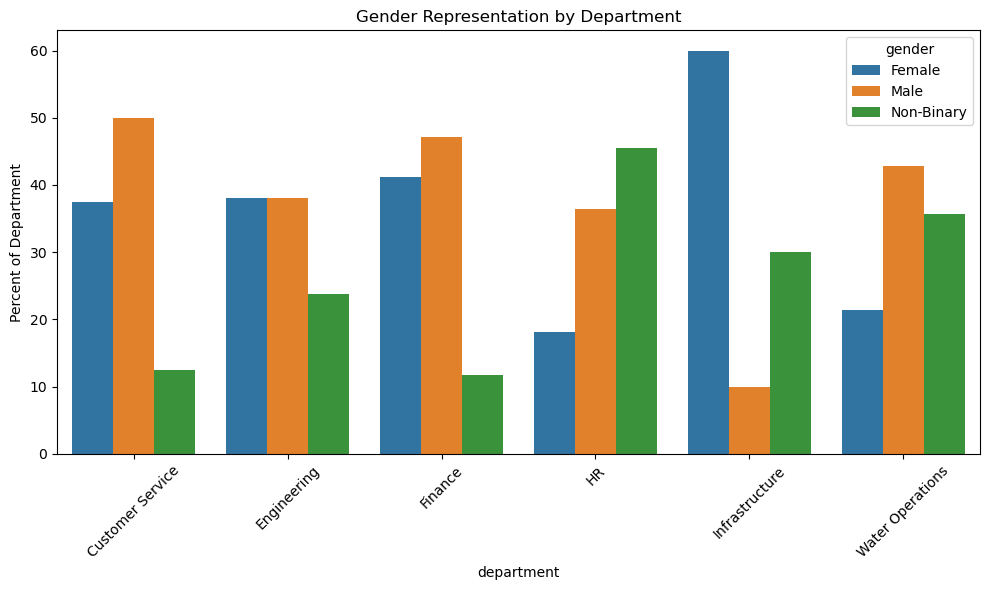

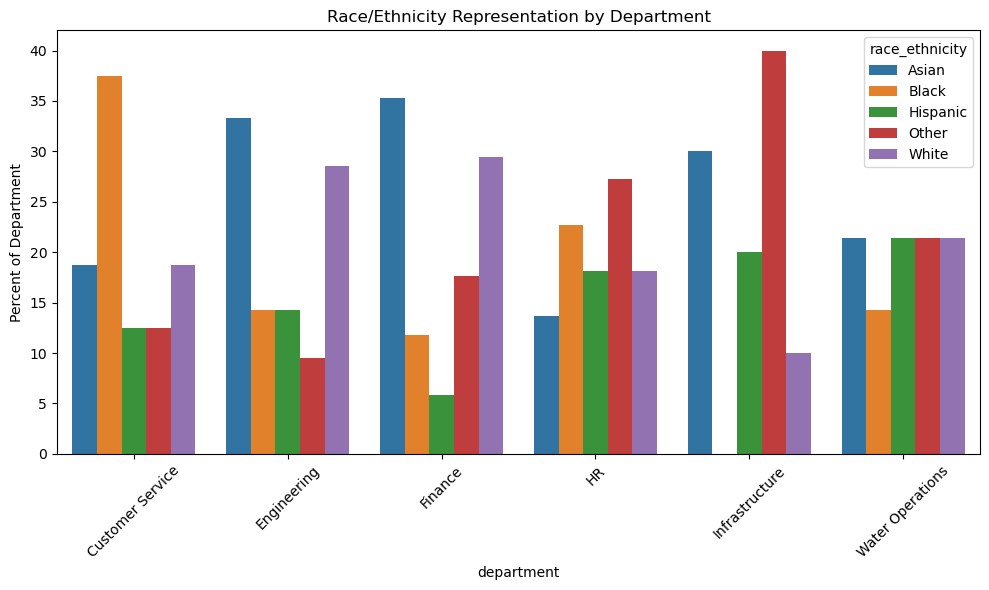

KeyError: 'Column not found: salary'

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load merged dataset
# ----------------------------
df = pd.read_csv("d:/PeopleSoft_with_DEI.csv")

# Ensure date is datetime
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

# ----------------------------
# 2. Gender Representation by Department
# ----------------------------
repr_gender = (
    df.groupby(['department', 'gender'])
    .size()
    .reset_index(name='count')
)
totals = repr_gender.groupby('department')['count'].transform('sum')
repr_gender['pct'] = (repr_gender['count'] / totals) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=repr_gender, x='department', y='pct', hue='gender')
plt.title('Gender Representation by Department')
plt.ylabel('Percent of Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Race/Ethnicity Representation by Department
# ----------------------------
repr_race = (
    df.groupby(['department', 'race_ethnicity'])
    .size()
    .reset_index(name='count')
)
totals = repr_race.groupby('department')['count'].transform('sum')
repr_race['pct'] = (repr_race['count'] / totals) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=repr_race, x='department', y='pct', hue='race_ethnicity')
plt.title('Race/Ethnicity Representation by Department')
plt.ylabel('Percent of Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Median Salary by Gender
# ----------------------------
salary_gender = df.groupby('gender')['salary'].median().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=salary_gender, x='gender', y='salary')
plt.title('Median Salary by Gender')
plt.ylabel('Median Salary')
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Median Salary by Race/Ethnicity
# ----------------------------
salary_race = df.groupby('race_ethnicity')['salary'].median().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=salary_race, x='race_ethnicity', y='salary')
plt.title('Median Salary by Race/Ethnicity')
plt.ylabel('Median Salary')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Turnover by Gender
# ----------------------------
turnover_gender = (
    df[df['employment_status'] == 'Terminated']
    .groupby('gender')
    .size()
    .reset_index(name='terminations')
)

plt.figure(figsize=(6,4))
sns.barplot(data=turnover_gender, x='gender', y='terminations')
plt.title('Turnover by Gender')
plt.ylabel('Number of Terminations')
plt.tight_layout()
plt.show()

# ----------------------------
# 7. Turnover by Race/Ethnicity
# ----------------------------
turnover_race = (
    df[df['employment_status'] == 'Terminated']
    .groupby('race_ethnicity')
    .size()
    .reset_index(name='terminations')
)

plt.figure(figsize=(8,4))
sns.barplot(data=turnover_race, x='race_ethnicity', y='terminations')
plt.title('Turnover by Race/Ethnicity')
plt.ylabel('Number of Terminations')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("PeopleSoft_with_DEI.csv")

# Rename merged salary column for DEI analysis
df = df.rename(columns={'salary_y': 'salary'})

# Optional: drop the old PeopleSoft salary if not needed
df = df.drop(columns=['salary_x'])

In [46]:
import pandas as pd

df = pd.read_csv("d:/PeopleSoft_with_DEI.csv")


In [47]:
# Rename merged salary column for DEI analysis
df = df.rename(columns={'salary_y': 'salary'})

# Optional: drop the old PeopleSoft salary if not needed
df = df.drop(columns=['salary_x'])

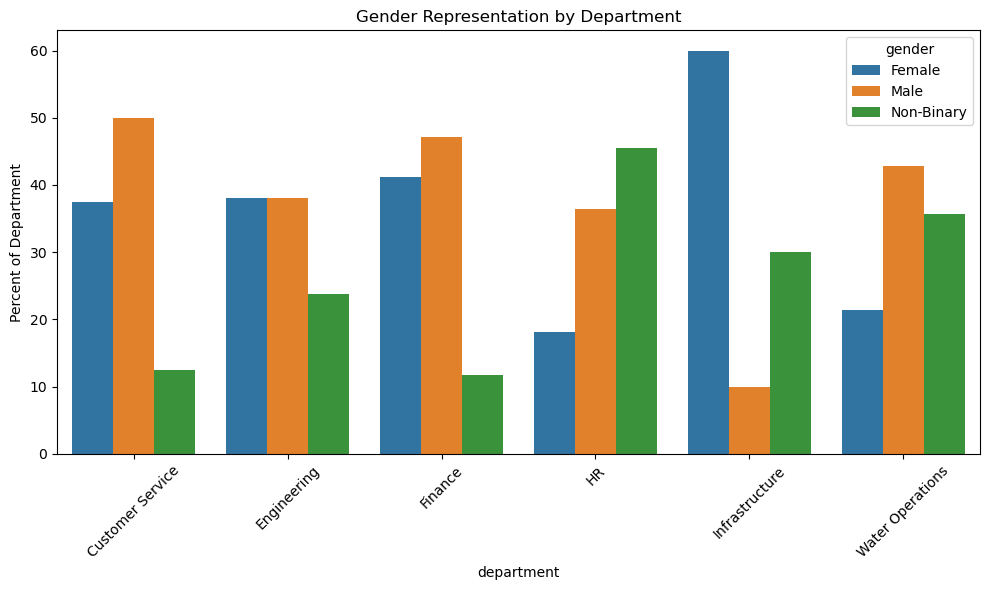

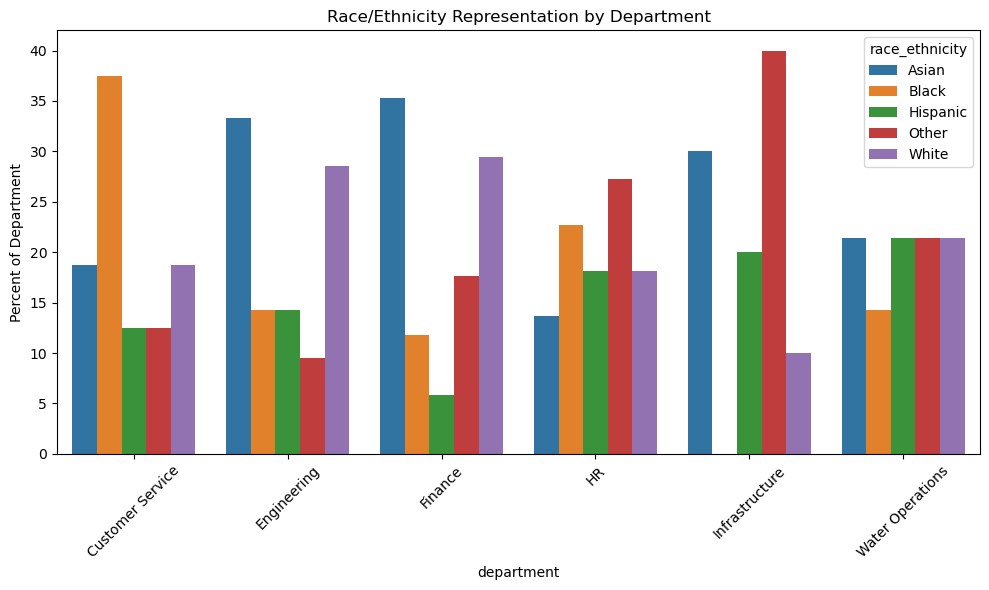

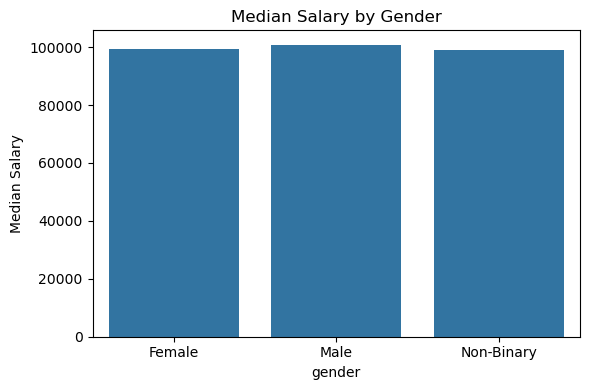

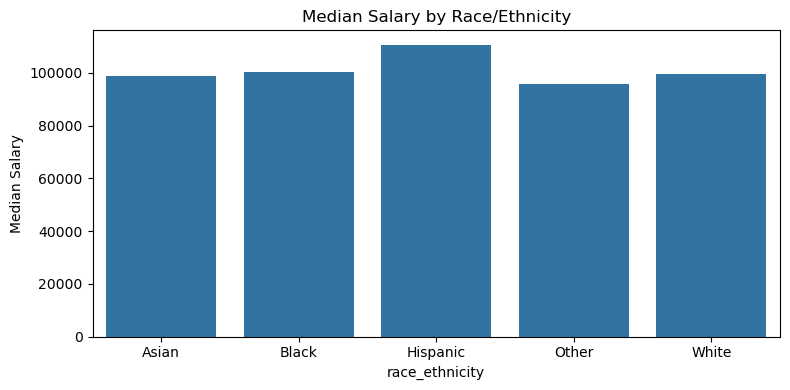

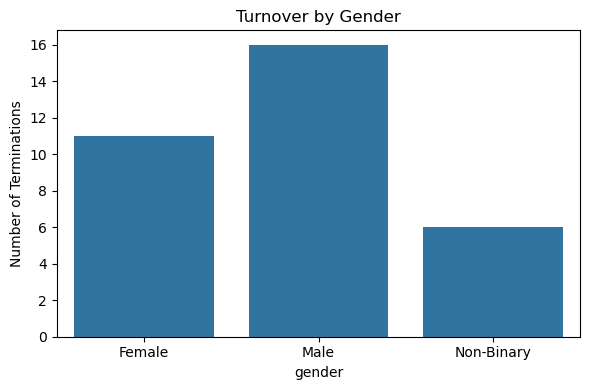

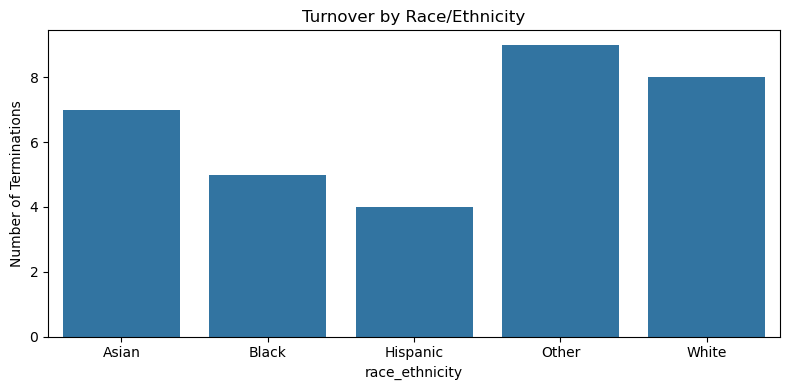

In [48]:
# Ensure date is datetime
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

# ----------------------------
# 2. Gender Representation by Department
# ----------------------------
repr_gender = (
    df.groupby(['department', 'gender'])
    .size()
    .reset_index(name='count')
)
totals = repr_gender.groupby('department')['count'].transform('sum')
repr_gender['pct'] = (repr_gender['count'] / totals) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=repr_gender, x='department', y='pct', hue='gender')
plt.title('Gender Representation by Department')
plt.ylabel('Percent of Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Race/Ethnicity Representation by Department
# ----------------------------
repr_race = (
    df.groupby(['department', 'race_ethnicity'])
    .size()
    .reset_index(name='count')
)
totals = repr_race.groupby('department')['count'].transform('sum')
repr_race['pct'] = (repr_race['count'] / totals) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=repr_race, x='department', y='pct', hue='race_ethnicity')
plt.title('Race/Ethnicity Representation by Department')
plt.ylabel('Percent of Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Median Salary by Gender
# ----------------------------
salary_gender = df.groupby('gender')['salary'].median().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=salary_gender, x='gender', y='salary')
plt.title('Median Salary by Gender')
plt.ylabel('Median Salary')
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Median Salary by Race/Ethnicity
# ----------------------------
salary_race = df.groupby('race_ethnicity')['salary'].median().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=salary_race, x='race_ethnicity', y='salary')
plt.title('Median Salary by Race/Ethnicity')
plt.ylabel('Median Salary')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Turnover by Gender
# ----------------------------
turnover_gender = (
    df[df['employment_status'] == 'Terminated']
    .groupby('gender')
    .size()
    .reset_index(name='terminations')
)

plt.figure(figsize=(6,4))
sns.barplot(data=turnover_gender, x='gender', y='terminations')
plt.title('Turnover by Gender')
plt.ylabel('Number of Terminations')
plt.tight_layout()
plt.show()

# ----------------------------
# 7. Turnover by Race/Ethnicity
# ----------------------------
turnover_race = (
    df[df['employment_status'] == 'Terminated']
    .groupby('race_ethnicity')
    .size()
    .reset_index(name='terminations')
)

plt.figure(figsize=(8,4))
sns.barplot(data=turnover_race, x='race_ethnicity', y='terminations')
plt.title('Turnover by Race/Ethnicity')
plt.ylabel('Number of Terminations')
plt.tight_layout()
plt.show()